In [2]:
# 模块导入
import pandas as pd
import matplotlib.pyplot as plt
# plt设置
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
""" 数据说明
   
    test.xlsx:

    date：日期
    group：组别（控制组/实验组）
    requests：订单请求数
    gmv：成交总额
    coupon per trip：每单优惠券金额
    trips：订单数
    canceled requests：取消请求数

    city.xlsx:

    date：日期
    hour：时点
    requests：请求数
    trips：订单数
    supply hours：可服务时长
    average minutes of trips：平均订单时长（分钟）
    pETA：顾客预计等待时长
    aETA：顾客实际等待时长
    utiliz：司机在忙率

"""

# 读取数据
city_df = pd.read_excel('city.xlsx')
city_df.head(2)

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297


顾客实际等待时长最大值:12.06分钟
顾客实际等待时长最小值:4.61分钟
0


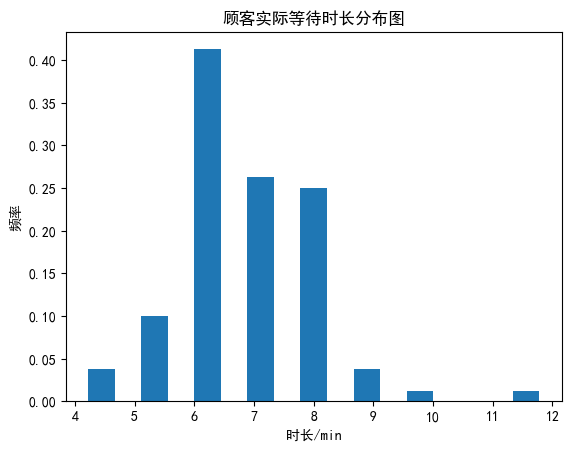

In [11]:
"""
字段分析:aETA：顾客实际等待时长
"""
# 最大值和最小值
max_aETA, min_aETA = city_df['aETA'].max(), city_df['aETA'].min()
print("顾客实际等待时长最大值:{}分钟".format(max_aETA))
print("顾客实际等待时长最小值:{}分钟".format(min_aETA))

# 检查有无顾客实际等待时长为0的异常值
print(len(city_df[city_df['aETA'] == 0]))
# 为可视化顾客实际等待时长频率分布
bins = int(max_aETA)-int(min_aETA)+1
plt.hist(city_df['aETA'].apply(lambda x: int(x)), bins=bins,rwidth=0.5,density=True)
plt.xlabel('时长/min')
plt.ylabel('频率')
plt.title('顾客实际等待时长分布图')
plt.savefig('顾客实际等待时长分布图.png',dpi=300,bbox_inches='tight')

In [5]:
# 计算出总体的 平均顾客实际等待时长
wait_time_mean = city_df['aETA'].mean()
print('平均顾客实际等待时长:{:.2f}分钟'.format(wait_time_mean))

平均顾客实际等待时长:7.20分钟
